In [ ]:
pip install wordcloud

In [ ]:
pip install gensim

# **Import**

In [ ]:
import pandas as pd
import wordcloud
from sklearn.feature_extraction.text import TfidfVectorizer

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_fix.csv')
dataset.head()

Unnamed: 0                       id_review  \
0           0  0AV0mU6Ah4sD7RW2nv0oq6Di3Xk1Xc   
1           1  0De9jM9LB3gz7jp0Uo2Wm5oO0cJ3Gn   
2           2  0EZ7BP9hm1uE7CO9cV7gJ8XX8Fs4aD   
3           3  0Hd8XX7Ag5SZ6OA2PE9Wj1bh8FD5tG   
4           4  0Hi1ad3Jw4ui8gm0Th1xT1EP8Um7xj   

                                  review_clean_cased  \
0  Pernah kesini waktu SD dulu lokasi nya real ma...   
1  Disini pas banget buat piknik bareng keluarga ...   
2  Sudah beberapa kali ke Candi Borobudur Tempatn...   
3  Salah satu tujuan utama ke Yogyakarta adalah k...   
4  Waktu yang tepat untuk mengunjungi borobudur a...   

                                  review_low_uncased  \
0  pernah kesini waktu sd dulu lokasi nya real ma...   
1  disini pas banget buat piknik bareng keluarga ...   
2  sudah beberapa kali ke candi borobudur tempatn...   
3  salah satu tujuan utama ke yogyakarta adalah k...   
4  waktu yang tepat untuk mengunjungi borobudur a...   

                                              review  attractions  amenities  \
0  Pernah kesini waktu SD dulu lokasi nya real ma...            3          0   
1  Disini pas banget buat piknik bareng keluarga ...            3          0   
2  Sudah beberapa kali ke Candi Borobudur. Tempat...            3          3   
3  Salah satu tujuan utama ke Yogyakarta adalah k...            3          0   
4  Waktu yang tepat untuk mengunjungi borobudur a...            0          3   

   access  price  no_aspect  \
0       0      0          3   
1       0      0          3   
2       0      0          0   
3       3      0          2   
4       0      0          2   

                                    attractions_text  \
0  pernah kesini waktu sd dulu lokasi nya real ma...   
1  tempatnya sejuk dan sangat nyaman tempatnya se...   
2  tempatnya bersih terpeihara dilihat dari area ...   
3  tempat yang indah dan menakjubkan salah satu t...   
4                                               none   

                                      amenities_text  \
0                                               none   
1                                               none   
2  tempatnya bersih terpeihara dilihat dari area ...   
3                                               none   
4  waktu yang tepat untuk mengunjungi borobudur a...   

                                         access_text price_text  \
0                                               none       none   
1                                               none       none   
2                                               none       none   
3  sedia ojek payung agar tidak kepanasan sedia o...       none   
4                                               none       none   

                                      no_aspect_text  
0  boleh dicoba tuh kawan boleh dicoba tuh kawan ...  
1  disini pas banget buat piknik bareng keluarga ...  
2                                               none  
3  salah satu tujuan utama ke yogyakarta adalah k...  
4  waktu yang tepat untuk mengunjungi borobudur a...

# **Aspek Attractions**

### **Text Negatif**

In [ ]:
# Mengambil selain "none" dan mengambil "negative"
df_attractions = dataset[(dataset['attractions'] != 0) & ((dataset['attractions'] == 1))]
df_attractions_negatif = df_attractions[['attractions_text']].values

custom_stop_words = ['yang', 'di', 'dan', 'untuk', 'juga', 'ada', 'dari', 'anda', 'ke', 'sudah',
                     'ke', 'sangat', 'ini', 'yg', 'bisa', 'banyak', 'atau', 'dengan', 'lebih', 'kita', 'saya',
                     'tidak', 'salah', 'satu', 'hanya', 'akan', 'dapat', 'karena', 'adalah', 'jadi', 'nya']
              #tambahin kata-kata gapenting disini.

def elim_stopword(text):
    tokens = text.split(" ")
    filtered_tokens = [token for token in tokens if token.lower() not in custom_stop_words]
    joined_text = " ".join(filtered_tokens)

    return joined_text

df_attractions['attractions_text'] = df_attractions['attractions_text'].apply(lambda x: elim_stopword(x))

teks_negatif = df_attractions['attractions_text']
print(teks_negatif)
# df_attractions_negative.head()

24      setelah sekian puluh tahun gak kesini lagi smu...
90      terlalu panas terlalu luas terlalu panas terla...
137     arca berada didalam stupa utuh lagi dikarenaka...
203     teman teman saat berkunjung candi melihat kege...
205     sayang apa bila candi tersebut dirusak oleh ta...
                              ...                        
1506    mungkin kalau kesana jangan waktu liburan gak ...
1570    tempat bersejarah sebagai warisan dunia turis ...
1583    sapat suasana sepi tenang dingin maish kabut m...
1585    sama candinya pada rusak kaya itu kepala patun...
1615    sedang renovasi sehingga agak kurang nyaman na...
Name: attractions_text, Length: 75, dtype: object


<ipython-input-12-73ce9ec074e2>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attractions['attractions_text'] = df_attractions['attractions_text'].apply(lambda x: elim_stopword(x))


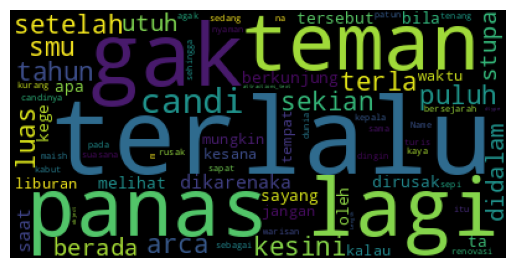

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

wordcloud = WordCloud().generate(str(teks_negatif))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# **LDA Topic Modelling**

In [ ]:
def tokenisasi(text):
    tokens = text.split(" ")
    return tokens
tokens_negatif = [tokenisasi(t) for t in teks_negatif]
print(tokens_negatif)

[['setelah', 'sekian', 'puluh', 'tahun', 'gak', 'kesini', 'lagi', 'smuanya', 'berubah', 'kondisi', 'candi', 'skrg', 'diperbaiki', 'dulu', 'terkesan', 'besar', 'megah', 'sekarang', 'koq', 'rasanya', 'biasa', 'ajah', 'kondisi', 'candi', 'skrg', 'diperbaiki', 'dulu', 'terkesan', 'besar', 'megah', 'sekarang', 'koq', 'rasanya', 'biasa', 'ajah', 'kondisi', 'candi', 'skrg', 'diperbaiki', 'dulu', 'terkesan', 'besar', 'megah', 'sekarang', 'koq', 'rasanya', 'biasa', 'ajah'], ['terlalu', 'panas', 'terlalu', 'luas', 'terlalu', 'panas', 'terlalu', 'luas', 'terlalu', 'panas', 'terlalu', 'luas'], ['arca', 'berada', 'didalam', 'stupa', 'utuh', 'lagi', 'dikarenakan', 'jamahan', 'tangan', 'tangan', 'jahil', 'arca', 'berada', 'didalam', 'stupa', 'utuh', 'lagi', 'dikarenakan', 'jamahan', 'tangan', 'tangan', 'jahil'], ['teman', 'teman', 'saat', 'berkunjung', 'candi', 'melihat', 'kegersangan', 'disekitar', 'candi', 'rumput', 'rumput', 'pada', 'kering', 'kesannya', 'disiram', 'rutin', 'dimusim', 'kemarau', '

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(tokens_negatif)
# Create Corpus
# Term Frequency
corpus = [id2word.doc2bow(text) for text in tokens_negatif]
# View
print(id2word)
print(corpus[:1])

Dictionary<616 unique tokens: ['ajah', 'berubah', 'besar', 'biasa', 'candi']...>
[[(0, 3), (1, 1), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (7, 1), (8, 1), (9, 3), (10, 3), (11, 1), (12, 3), (13, 1), (14, 3), (15, 3), (16, 1), (17, 1), (18, 3), (19, 1), (20, 1), (21, 3)]]


In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('ajah', 3),
  ('berubah', 1),
  ('besar', 3),
  ('biasa', 3),
  ('candi', 3),
  ('diperbaiki', 3),
  ('dulu', 3),
  ('gak', 1),
  ('kesini', 1),
  ('kondisi', 3),
  ('koq', 3),
  ('lagi', 1),
  ('megah', 3),
  ('puluh', 1),
  ('rasanya', 3),
  ('sekarang', 3),
  ('sekian', 1),
  ('setelah', 1),
  ('skrg', 3),
  ('smuanya', 1),
  ('tahun', 1),
  ('terkesan', 3)]]

In [ ]:
# Build LDA model
import gensim
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=5,random_state=100,chunksize=100,passes=10,per_word_topics=True)

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics,random_state=100,chunksize=100,passes=10,per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
start=1
limit=11
step=1
model_list, coherence_values = compute_coherence_values(id2word, corpus, tokens_negatif, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
print("coherence_values: ", coherence_values)

coherence_values:  [0.4507318539064589, 0.34624198879665025, 0.409048148179384, 0.3840109938713219, 0.4495489490076351, 0.41075187581551464, 0.3945641456420514, 0.37482042528511045, 0.38386330554638703, 0.3955635115374278]


In [ ]:
lda_model.print_topics() #num_word default is 10
#lda_model.show_topics() #ini juga bisa

[(0,
  '0.034*"candi" + 0.016*"pengunjung" + 0.013*"tdk" + 0.012*"berkunjung" + 0.010*"hari" + 0.010*"borobudur" + 0.010*"tempat" + 0.010*"gak" + 0.010*"agak" + 0.010*"kurang"'),
 (1,
  '0.040*"candi" + 0.018*"naik" + 0.016*"saat" + 0.015*"rumput" + 0.015*"saja" + 0.012*"area" + 0.011*"sayang" + 0.009*"banget" + 0.009*"kemarau" + 0.008*"lagi"'),
 (2,
  '0.026*"naik" + 0.026*"masuk" + 0.023*"atas" + 0.021*"candi" + 0.020*"panas" + 0.020*"tiket" + 0.017*"sampai" + 0.017*"pelataran" + 0.016*"borobudur" + 0.015*"aja"'),
 (3,
  '0.027*"atas" + 0.023*"naik" + 0.023*"pengunjung" + 0.016*"candi" + 0.014*"tapi" + 0.013*"terlalu" + 0.012*"k" + 0.012*"orang" + 0.012*"sekali" + 0.012*"saat"'),
 (4,
  '0.024*"candi" + 0.021*"kalau" + 0.020*"kemarau" + 0.018*"gak" + 0.017*"musim" + 0.016*"nyaman" + 0.016*"jauh" + 0.015*"panas" + 0.013*"waktu" + 0.013*"banget"')]

In [ ]:
print("Topic distribution for document :", " ".join(tokens_negatif[0]))
print("feature of each token:", [(id2word[id], freq) for id, freq in corpus[0]])
lda_model.get_document_topics(corpus[0])

Topic distribution for document : setelah sekian puluh tahun gak kesini lagi smuanya berubah kondisi candi skrg diperbaiki dulu terkesan besar megah sekarang koq rasanya biasa ajah kondisi candi skrg diperbaiki dulu terkesan besar megah sekarang koq rasanya biasa ajah kondisi candi skrg diperbaiki dulu terkesan besar megah sekarang koq rasanya biasa ajah
feature of each token: [('ajah', 3), ('berubah', 1), ('besar', 3), ('biasa', 3), ('candi', 3), ('diperbaiki', 3), ('dulu', 3), ('gak', 1), ('kesini', 1), ('kondisi', 3), ('koq', 3), ('lagi', 1), ('megah', 3), ('puluh', 1), ('rasanya', 3), ('sekarang', 3), ('sekian', 1), ('setelah', 1), ('skrg', 3), ('smuanya', 1), ('tahun', 1), ('terkesan', 3)]


[(1, 0.9835458)]

In [ ]:
import pandas as pd
def format_topics_sentences(ldamodel, corpus, texts):
      # Init output
      sent_topics_df = pd.DataFrame()

      # Get main topic in each document
      for i, row in enumerate(ldamodel[corpus]):
          row = sorted(row[0], key=lambda x: (x[1]), reverse=True)   # tambahkan indeks [0] pada variabel row

          # Get the Dominant topic, Perc Contribution and Keywords for each document
          for j, (topic_num, prop_topic) in enumerate(row):
              if j == 0: # => dominant topic
                   wp = ldamodel.show_topic(topic_num, 5) #get most  significant topic
                   topic_keywords = ", ".join([word for word, prop in wp])
                   sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
              else:
                   break
      sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

      # Add original text to the end of the output
      contents = pd.Series(texts)
      sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
      return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=tokens_negatif)
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Topic Keywords', 'Text']

#Save to csv
df_dominant_topic.to_csv('/content/drive/MyDrive/Colab Notebooks/doc_topic_dominant_attractions_negative.csv')
# Show
df_dominant_topic.head(5)

<ipython-input-22-873360e6b3c5>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-22-873360e6b3c5>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-22-873360e6b3c5>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-22-873360e6b3c5>:15: FutureWarning: The frame.append method is deprecated and will be removed from p

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               1              0.9835   
1            1               3              0.9379   
2            2               3              0.9650   
3            3               1              0.9917   
4            4               0              0.9845   

                             Topic Keywords  \
0           candi, naik, saat, rumput, saja   
1       atas, naik, pengunjung, candi, tapi   
2       atas, naik, pengunjung, candi, tapi   
3           candi, naik, saat, rumput, saja   
4  candi, pengunjung, tdk, berkunjung, hari   

                                                Text  
0  [setelah, sekian, puluh, tahun, gak, kesini, l...  
1  [terlalu, panas, terlalu, luas, terlalu, panas...  
2  [arca, berada, didalam, stupa, utuh, lagi, dik...  
3  [teman, teman, saat, berkunjung, candi, meliha...  
4  [sayang, apa, bila, candi, tersebut, dirusak, ...

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model,
texts=tokens_negatif, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4495489490076351


In [ ]:
coherence_per_topic = coherence_model_lda.get_coherence_per_topic()
print('\nCoherence Per Topic Score: ', coherence_per_topic)


Coherence Per Topic Score:  [0.45562590106935047, 0.5251653777938474, 0.3373481259900848, 0.43386854529786645, 0.4957367948870265]


In [ ]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn,

In [ ]:
pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 23.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [ ]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
# Visualize the topics

pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.001379  0.010184       1        1  22.469962
3      0.070559 -0.040490       2        1  21.087251
4     -0.134547  0.166151       3        1  20.805760
2     -0.117057 -0.166981       4        1  18.791285
0      0.182424  0.031135       5        1  16.845741, topic_info=           Term       Freq      Total Category  logprob  loglift
155       masuk  15.000000  15.000000  Default  30.0000  30.0000
73   pengunjung  24.000000  24.000000  Default  29.0000  29.0000
194        atas  37.000000  37.000000  Default  28.0000  28.0000
47      kemarau  19.000000  19.000000  Default  27.0000  27.0000
164       tiket  15.000000  15.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
123        naik   3.440019  49.367909   Topic5  -5.0242  -0.8828
122      wisata   2.661069   9.141669   Topic5  -5.2810   0.5470
298      nyaman   2.676529  17.545229   Topic5  -5.2752  -0.0992
168      relief   2.622458   5.797107   Topic5  -5.2956   0.9878
318         jam   2.630487  10.767813   Topic5  -5.2925   0.3717

[313 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
128       1  0.190484    agak
128       2  0.190484    agak
128       4  0.317473    agak
128       5  0.317473    agak
243       1  0.189101     aja
...     ...       ...     ...
416       3  0.976180   waktu
122       2  0.109389  wisata
122       3  0.546946  wisata
122       5  0.328168  wisata
389       2  0.892194       x

[402 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 5, 3, 1])